In [1]:
#control experiment. prediction without reasoning.

%reload_ext autoreload
%autoreload 2

import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

from transformers import AutoTokenizer
import pandas as pd
import random
import copy
from llmchem.utils import clean_vram,make_project_dirs
from llmchem.model import init_model
from llmchem.train import train_model
from llmchem.eval import eval_model

/home/setup/miniconda3/envs/chemllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#dataset settings
n_test=50 #number of testing data
n_train_check=50 #number of training data for checking (i.e., checking everything takes too long, so we check only a part of training data)



#LoRA settings

bit=16
#bit=8
#bit=4

#train settings
gradient_checkpointing =False
per_device_train_batch_size=1
lr=10**-5

#device settings
device_map="auto"

#dataset path
dataset_path="dataset/231225AutoReasoning/240117best_reason_record_11k.csv"


#eval_settings
n_prompt_examples=0


In [3]:
model_dict={
"Llama2-7b":{
"name":"meta-llama/Llama-2-7b-chat-hf",
"modules":[
    #"embed_tokens",
    "lm_head",
    #"q_proj",
    #"k_proj",
    "v_proj",
    "o_proj",
    "gate_proj",
    "up_proj",
    #"down_proj",
]
},
}


GPT-generated reasons: 10000
Using fp16 mode


The model was loaded with use_flash_attention_2=True, which is deprecated and may be removed in a future release. Please use `attn_implementation="flash_attention_2"` instead.
Map: 100%|██████████| 10000/10000 [00:00<00:00, 38854.46 examples/s]
You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,2.076200
200,1.157000
300,0.937900
400,0.872800
500,0.850300
600,0.791200
700,0.801800
800,0.809800
900,0.793400
1000,0.808200


  0%|          | 0/50 [00:00<?, ?it/s]

promlem 1 / 50


  2%|▏         | 1/50 [00:00<00:37,  1.31it/s]

----


##Prediction: 155.0
##Prediction
actual:  210.0 predicted:  155.0
promlem 2 / 50


  4%|▍         | 2/50 [00:01<00:34,  1.38it/s]

----


##Prediction: -100.0
##Prediction
actual:  -117.0 predicted:  -100.0
promlem 3 / 50


  6%|▌         | 3/50 [00:02<00:35,  1.32it/s]

----


##Prediction: 135.0
##Prediction
actual:  64.0 predicted:  135.0
promlem 4 / 50


  8%|▊         | 4/50 [00:03<00:36,  1.26it/s]

----


##Prediction: 105.0
##Prediction
actual:  116.0 predicted:  105.0
promlem 5 / 50


 10%|█         | 5/50 [00:03<00:35,  1.27it/s]

----


##Prediction: 145.0
##Prediction
actual:  255.5 predicted:  145.0
promlem 6 / 50


 12%|█▏        | 6/50 [00:04<00:39,  1.11it/s]

----


##Prediction: -10.0
##Prediction
actual:  37.0 predicted:  -10.0
promlem 7 / 50


 14%|█▍        | 7/50 [00:05<00:35,  1.23it/s]

----


##Prediction: 55.0
##Prediction
actual:  56.0 predicted:  55.0
promlem 8 / 50


 16%|█▌        | 8/50 [00:06<00:32,  1.28it/s]

----


##Prediction: -100.0
##Prediction
actual:  -49.8 predicted:  -100.0
promlem 9 / 50


 18%|█▊        | 9/50 [00:07<00:31,  1.31it/s]

----


##Prediction: 205.0
##Prediction
actual:  204.0 predicted:  205.0
promlem 10 / 50


 20%|██        | 10/50 [00:07<00:30,  1.32it/s]

----


##Prediction: 150.0
##Prediction
actual:  127.0 predicted:  150.0
promlem 11 / 50


 22%|██▏       | 11/50 [00:08<00:29,  1.34it/s]

----


##Prediction: 105.0
##Prediction
actual:  66.0 predicted:  105.0
promlem 12 / 50


 24%|██▍       | 12/50 [00:09<00:27,  1.37it/s]

----


##Prediction: 10.0
##Prediction
actual:  42.0 predicted:  10.0
promlem 13 / 50


 26%|██▌       | 13/50 [00:10<00:31,  1.17it/s]

----


##Prediction: 155.0
##Prediction
actual:  149.05 predicted:  155.0
promlem 14 / 50


 28%|██▊       | 14/50 [00:11<00:29,  1.22it/s]

----


##Prediction: 115.0
##Prediction
actual:  104.0 predicted:  115.0
promlem 15 / 50


 30%|███       | 15/50 [00:11<00:27,  1.27it/s]

----


##Prediction: 155.0
##Prediction
actual:  156.0 predicted:  155.0
promlem 16 / 50


 32%|███▏      | 16/50 [00:12<00:26,  1.30it/s]

----


##Prediction: 105.0
##Prediction
actual:  121.0 predicted:  105.0
promlem 17 / 50


 34%|███▍      | 17/50 [00:13<00:24,  1.33it/s]

----


##Prediction: -20.0
##Prediction
actual:  17.0 predicted:  -20.0
promlem 18 / 50


 36%|███▌      | 18/50 [00:13<00:23,  1.35it/s]

----


##Prediction: 195.0
##Prediction
actual:  175.0 predicted:  195.0
promlem 19 / 50


 38%|███▊      | 19/50 [00:14<00:22,  1.38it/s]

----


##Prediction: 120.0
##Prediction
actual:  159.0 predicted:  120.0
promlem 20 / 50


 40%|████      | 20/50 [00:15<00:25,  1.19it/s]

----


##Prediction: 10.0
##Prediction
actual:  -27.9 predicted:  10.0
promlem 21 / 50


 42%|████▏     | 21/50 [00:16<00:23,  1.24it/s]

----


##Prediction: 145.0
##Prediction
actual:  139.0 predicted:  145.0
promlem 22 / 50


 44%|████▍     | 22/50 [00:17<00:22,  1.27it/s]

----


##Prediction: 100.0
##Prediction
actual:  18.0 predicted:  100.0
promlem 23 / 50


 46%|████▌     | 23/50 [00:17<00:20,  1.31it/s]

----


##Prediction: 150.0
##Prediction
actual:  248.0 predicted:  150.0
promlem 24 / 50


 48%|████▊     | 24/50 [00:18<00:19,  1.34it/s]

----


##Prediction: 175.0
##Prediction
actual:  220.0 predicted:  175.0
promlem 25 / 50


 50%|█████     | 25/50 [00:19<00:18,  1.37it/s]

----


##Prediction: -30.0
##Prediction
actual:  -10.0 predicted:  -30.0
promlem 26 / 50


 52%|█████▏    | 26/50 [00:20<00:17,  1.37it/s]

----


##Prediction: 155.0
##Prediction
actual:  232.0 predicted:  155.0
promlem 27 / 50


 54%|█████▍    | 27/50 [00:21<00:19,  1.18it/s]

----


##Prediction: -30.0
##Prediction
actual:  -62.0 predicted:  -30.0
promlem 28 / 50


 56%|█████▌    | 28/50 [00:21<00:17,  1.24it/s]

----


##Prediction: 135.0
##Prediction
actual:  176.0 predicted:  135.0
promlem 29 / 50


 58%|█████▊    | 29/50 [00:22<00:16,  1.30it/s]

----


##Prediction: 75.0
##Prediction
actual:  126.0 predicted:  75.0
promlem 30 / 50


 60%|██████    | 30/50 [00:23<00:15,  1.33it/s]

----


##Prediction: 25.0
##Prediction
actual:  24.0 predicted:  25.0
promlem 31 / 50


 62%|██████▏   | 31/50 [00:24<00:14,  1.35it/s]

----


##Prediction: 115.0
##Prediction
actual:  141.0 predicted:  115.0
promlem 32 / 50


 64%|██████▍   | 32/50 [00:24<00:13,  1.37it/s]

----


##Prediction: 210.0
##Prediction
actual:  239.0 predicted:  210.0
promlem 33 / 50


 66%|██████▌   | 33/50 [00:25<00:12,  1.38it/s]

----


##Prediction: 105.0
##Prediction
actual:  61.0 predicted:  105.0
promlem 34 / 50


 68%|██████▊   | 34/50 [00:26<00:13,  1.19it/s]

----


##Prediction: 105.0
##Prediction
actual:  41.75 predicted:  105.0
promlem 35 / 50


 70%|███████   | 35/50 [00:27<00:12,  1.23it/s]

----


##Prediction: 155.0
##Prediction
actual:  181.0 predicted:  155.0
promlem 36 / 50


 72%|███████▏  | 36/50 [00:28<00:10,  1.27it/s]

----


##Prediction: 100.0
##Prediction
actual:  98.0 predicted:  100.0
promlem 37 / 50


 74%|███████▍  | 37/50 [00:28<00:09,  1.31it/s]

----


##Prediction: 115.0
##Prediction
actual:  111.0 predicted:  115.0
promlem 38 / 50


 76%|███████▌  | 38/50 [00:29<00:08,  1.36it/s]

----


##Prediction: 155.0
##Prediction
actual:  180.0 predicted:  155.0
promlem 39 / 50


 78%|███████▊  | 39/50 [00:30<00:07,  1.39it/s]

----


##Prediction: 115.0
##Prediction
actual:  141.0 predicted:  115.0
promlem 40 / 50


 80%|████████  | 40/50 [00:30<00:07,  1.39it/s]

----


##Prediction: 205.0
##Prediction
actual:  159.0 predicted:  205.0
promlem 41 / 50


 82%|████████▏ | 41/50 [00:31<00:07,  1.19it/s]

----


##Prediction: 10.0
##Prediction
actual:  25.75 predicted:  10.0
promlem 42 / 50


 84%|████████▍ | 42/50 [00:32<00:06,  1.23it/s]

----


##Prediction: -100.0
##Prediction
actual:  -81.85 predicted:  -100.0
promlem 43 / 50


 86%|████████▌ | 43/50 [00:33<00:05,  1.29it/s]

----


##Prediction: 45.0
##Prediction
actual:  35.0 predicted:  45.0
promlem 44 / 50


 88%|████████▊ | 44/50 [00:34<00:04,  1.34it/s]

----


##Prediction: 10.0
##Prediction
actual:  19.0 predicted:  10.0
promlem 45 / 50


 90%|█████████ | 45/50 [00:34<00:03,  1.35it/s]

----


##Prediction: 105.0
##Prediction
actual:  65.0 predicted:  105.0
promlem 46 / 50


 92%|█████████▏| 46/50 [00:35<00:02,  1.38it/s]

----


##Prediction: 200.0
##Prediction
actual:  204.0 predicted:  200.0
promlem 47 / 50


 94%|█████████▍| 47/50 [00:36<00:02,  1.38it/s]

----


##Prediction: -100.0
##Prediction
actual:  -89.0 predicted:  -100.0
promlem 48 / 50


 96%|█████████▌| 48/50 [00:37<00:01,  1.17it/s]

----


##Prediction: 145.0
##Prediction
actual:  74.0 predicted:  145.0
promlem 49 / 50


 98%|█████████▊| 49/50 [00:38<00:00,  1.23it/s]

----


##Prediction: 200.0
##Prediction
actual:  130.0 predicted:  200.0
promlem 50 / 50


100%|██████████| 50/50 [00:38<00:00,  1.29it/s]


----


##Prediction: 115.0
##Prediction
actual:  125.0 predicted:  115.0


  0%|          | 0/50 [00:00<?, ?it/s]

promlem 1 / 50


  2%|▏         | 1/50 [00:00<00:35,  1.40it/s]

----


##Prediction: 155.0
##Prediction
actual:  121.0 predicted:  155.0
promlem 2 / 50


  4%|▍         | 2/50 [00:01<00:34,  1.37it/s]

----


##Prediction: 230.0
##Prediction
actual:  249.0 predicted:  230.0
promlem 3 / 50


  6%|▌         | 3/50 [00:02<00:33,  1.39it/s]

----


##Prediction: -10.0
##Prediction
actual:  -64.0 predicted:  -10.0
promlem 4 / 50


  8%|▊         | 4/50 [00:02<00:32,  1.41it/s]

----


##Prediction: -100.0
##Prediction
actual:  -125.0 predicted:  -100.0
promlem 5 / 50


 10%|█         | 5/50 [00:03<00:37,  1.20it/s]

----


##Prediction: 185.0
##Prediction
actual:  115.0 predicted:  185.0
promlem 6 / 50


 12%|█▏        | 6/50 [00:04<00:34,  1.26it/s]

----


##Prediction: 155.0
##Prediction
actual:  77.0 predicted:  155.0
promlem 7 / 50


 14%|█▍        | 7/50 [00:05<00:33,  1.30it/s]

----


##Prediction: 125.0
##Prediction
actual:  152.0 predicted:  125.0
promlem 8 / 50


 16%|█▌        | 8/50 [00:06<00:31,  1.35it/s]

----


##Prediction: -10.0
##Prediction
actual:  -33.0 predicted:  -10.0
promlem 9 / 50


 18%|█▊        | 9/50 [00:06<00:29,  1.38it/s]

----


##Prediction: 115.0
##Prediction
actual:  111.5 predicted:  115.0
promlem 10 / 50


 20%|██        | 10/50 [00:07<00:28,  1.40it/s]

----


##Prediction: 105.0
##Prediction
actual:  65.0 predicted:  105.0
promlem 11 / 50


 22%|██▏       | 11/50 [00:08<00:27,  1.42it/s]

----


##Prediction: 50.0
##Prediction
actual:  82.0 predicted:  50.0
promlem 12 / 50


 24%|██▍       | 12/50 [00:09<00:31,  1.21it/s]

----


##Prediction: 165.0
##Prediction
actual:  162.5 predicted:  165.0
promlem 13 / 50


 26%|██▌       | 13/50 [00:09<00:29,  1.26it/s]

----


##Prediction: 105.0
##Prediction
actual:  162.0 predicted:  105.0
promlem 14 / 50


 28%|██▊       | 14/50 [00:10<00:28,  1.25it/s]

----


##Prediction: 100.0
##Prediction
actual:  -114.0 predicted:  100.0
promlem 15 / 50


 30%|███       | 15/50 [00:11<00:27,  1.28it/s]

----


##Prediction: 160.0
##Prediction
actual:  187.5 predicted:  160.0
promlem 16 / 50


 32%|███▏      | 16/50 [00:12<00:26,  1.31it/s]

----


##Prediction: 105.0
##Prediction
actual:  96.0 predicted:  105.0
promlem 17 / 50


 34%|███▍      | 17/50 [00:12<00:24,  1.33it/s]

----


##Prediction: 105.0
##Prediction
actual:  178.5 predicted:  105.0
promlem 18 / 50


 36%|███▌      | 18/50 [00:13<00:23,  1.34it/s]

----


##Prediction: 100.0
##Prediction
actual:  105.0 predicted:  100.0
promlem 19 / 50


 38%|███▊      | 19/50 [00:14<00:26,  1.18it/s]

----


##Prediction: 105.0
##Prediction
actual:  135.0 predicted:  105.0
promlem 20 / 50


 40%|████      | 20/50 [00:15<00:24,  1.24it/s]

----


##Prediction: 105.0
##Prediction
actual:  158.7 predicted:  105.0
promlem 21 / 50


 42%|████▏     | 21/50 [00:16<00:22,  1.28it/s]

----


##Prediction: 200.0
##Prediction
actual:  148.0 predicted:  200.0
promlem 22 / 50


 44%|████▍     | 22/50 [00:16<00:21,  1.31it/s]

----


##Prediction: 155.0
##Prediction
actual:  179.5 predicted:  155.0
promlem 23 / 50


 46%|████▌     | 23/50 [00:17<00:20,  1.34it/s]

----


##Prediction: -10.0
##Prediction
actual:  -25.2 predicted:  -10.0
promlem 24 / 50


 48%|████▊     | 24/50 [00:18<00:19,  1.35it/s]

----


##Prediction: 155.0
##Prediction
actual:  164.0 predicted:  155.0
promlem 25 / 50


 50%|█████     | 25/50 [00:19<00:18,  1.37it/s]

----


##Prediction: 105.0
##Prediction
actual:  129.0 predicted:  105.0
promlem 26 / 50


 52%|█████▏    | 26/50 [00:20<00:19,  1.21it/s]

----


##Prediction: 105.0
##Prediction
actual:  163.0 predicted:  105.0
promlem 27 / 50


 54%|█████▍    | 27/50 [00:20<00:17,  1.28it/s]

----


##Prediction: 145.0
##Prediction
actual:  210.8 predicted:  145.0
promlem 28 / 50


 56%|█████▌    | 28/50 [00:21<00:16,  1.32it/s]

----


##Prediction: 10.0
##Prediction
actual:  -3.0 predicted:  10.0
promlem 29 / 50


 58%|█████▊    | 29/50 [00:22<00:15,  1.34it/s]

----


##Prediction: 135.0
##Prediction
actual:  153.0 predicted:  135.0
promlem 30 / 50


 60%|██████    | 30/50 [00:22<00:14,  1.36it/s]

----


##Prediction: -100.0
##Prediction
actual:  -95.0 predicted:  -100.0
promlem 31 / 50


 62%|██████▏   | 31/50 [00:23<00:13,  1.41it/s]

----


##Prediction: 45.0
##Prediction
actual:  38.0 predicted:  45.0
promlem 32 / 50


 64%|██████▍   | 32/50 [00:24<00:12,  1.40it/s]

----


##Prediction: 240.0
##Prediction
actual:  251.0 predicted:  240.0
promlem 33 / 50


 66%|██████▌   | 33/50 [00:25<00:14,  1.20it/s]

----


##Prediction: -40.0
##Prediction
actual:  -45.05 predicted:  -40.0
promlem 34 / 50


 68%|██████▊   | 34/50 [00:26<00:12,  1.25it/s]

----


##Prediction: 135.0
##Prediction
actual:  47.0 predicted:  135.0
promlem 35 / 50


 70%|███████   | 35/50 [00:26<00:11,  1.28it/s]

----


##Prediction: 105.0
##Prediction
actual:  84.0 predicted:  105.0
promlem 36 / 50


 72%|███████▏  | 36/50 [00:27<00:10,  1.34it/s]

----


##Prediction: 155.0
##Prediction
actual:  69.0 predicted:  155.0
promlem 37 / 50


 74%|███████▍  | 37/50 [00:28<00:09,  1.37it/s]

----


##Prediction: 145.0
##Prediction
actual:  177.0 predicted:  145.0
promlem 38 / 50


 76%|███████▌  | 38/50 [00:28<00:08,  1.38it/s]

----


##Prediction: 35.0
##Prediction
actual:  93.0 predicted:  35.0
promlem 39 / 50


 78%|███████▊  | 39/50 [00:29<00:08,  1.34it/s]

----


##Prediction: 225.0
##Prediction
actual:  213.0 predicted:  225.0
promlem 40 / 50


 80%|████████  | 40/50 [00:30<00:08,  1.12it/s]

----


##Prediction: 135.0
##Prediction
actual:  102.0 predicted:  135.0
promlem 41 / 50


 82%|████████▏ | 41/50 [00:31<00:07,  1.14it/s]

----


##Prediction: 105.0
##Prediction
actual:  32.5 predicted:  105.0
promlem 42 / 50


 84%|████████▍ | 42/50 [00:32<00:06,  1.21it/s]

----


##Prediction: 145.0
##Prediction
actual:  170.0 predicted:  145.0
promlem 43 / 50


 86%|████████▌ | 43/50 [00:33<00:05,  1.27it/s]

----


##Prediction: 35.0
##Prediction
actual:  47.6 predicted:  35.0
promlem 44 / 50


 88%|████████▊ | 44/50 [00:33<00:04,  1.33it/s]

----


##Prediction: 150.0
##Prediction
actual:  147.0 predicted:  150.0
promlem 45 / 50


 90%|█████████ | 45/50 [00:34<00:03,  1.36it/s]

----


##Prediction: 35.0
##Prediction
actual:  -8.5 predicted:  35.0
promlem 46 / 50


 92%|█████████▏| 46/50 [00:35<00:02,  1.37it/s]

----


##Prediction: 155.0
##Prediction
actual:  141.5 predicted:  155.0
promlem 47 / 50


 94%|█████████▍| 47/50 [00:36<00:02,  1.21it/s]

----


##Prediction: -30.0
##Prediction
actual:  52.0 predicted:  -30.0
promlem 48 / 50


 96%|█████████▌| 48/50 [00:37<00:01,  1.27it/s]

----


##Prediction: -40.0
##Prediction
actual:  -35.0 predicted:  -40.0
promlem 49 / 50


 98%|█████████▊| 49/50 [00:37<00:00,  1.31it/s]

----


##Prediction: 155.0
##Prediction
actual:  126.5 predicted:  155.0
promlem 50 / 50


100%|██████████| 50/50 [00:38<00:00,  1.30it/s]

----


##Prediction: 105.0
##Prediction
actual:  12.0 predicted:  105.0


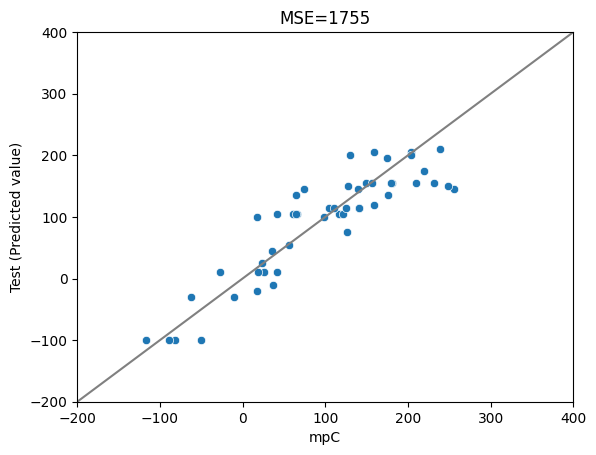

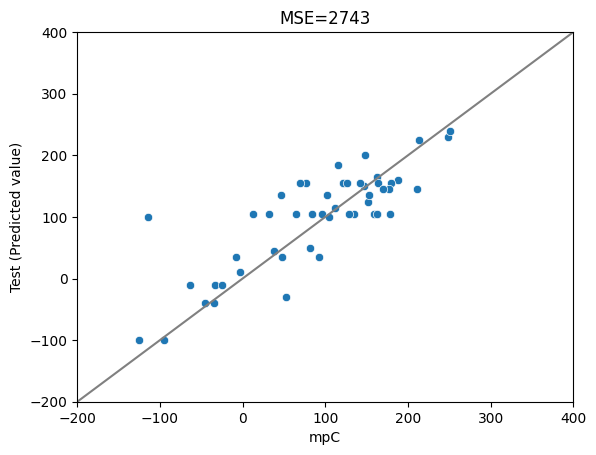

In [4]:
for model_nickname in model_dict:
    model_name=model_dict[model_nickname]["name"]
    target_modules= model_dict[model_nickname]["modules"]
    for epochs in [3]:
        for r in [32]:
            lora_alpha=r
            for n_train in [10000]:
                    #project path
                    project_dir=f"results/projects/240119WithoutReason/{model_nickname}_{epochs}_{r}_{n_train}"

                    #make project dir
                    make_project_dirs(project_dir)

                    #load base dataset
                    df=pd.read_csv(dataset_path)
                    dataset=df.to_dict(orient="records")
                    random.seed(0)
                    random.shuffle(dataset)

                    #prediction without reason
                    for data in dataset:
                        data["Reason"]="-"

                    train_dataset=dataset[:n_train]
                    test_dataset=dataset[-n_test:]


                    #prepare train dataset
                    print(f"GPT-generated reasons: {len(train_dataset)}")

                    random.shuffle(train_dataset)

                    #train model
                    clean_vram()
                    tokenizer = AutoTokenizer.from_pretrained(model_name)
                    tokenizer.pad_token = tokenizer.eos_token
                    model=init_model(model_name, r, lora_alpha, target_modules, bit=bit,device_map=device_map)
                    train_result=train_model(model,tokenizer,train_dataset,
                                    project_dir=project_dir,
                                    epochs=epochs,
                                    lr=lr,
                                    per_device_train_batch_size=per_device_train_batch_size,
                                    gradient_checkpointing=gradient_checkpointing,
                                    )

                    #eval
                    train_check_dataset=copy.deepcopy(train_dataset[:n_train_check])
                    random.shuffle(train_check_dataset)
                    train_eval_result=eval_model(model,tokenizer,train_check_dataset,
                                                f"{project_dir}/eval",
                                                n_prompt_examples=n_prompt_examples,
                                                prefix=f"train"
                                                )

                    test_eval_result=eval_model(model,tokenizer,test_dataset,
                                                f"{project_dir}/eval",
                                                n_prompt_examples=n_prompt_examples,
                                                prefix=f"test"
                                                )

